<a href="https://colab.research.google.com/github/HaydenLee0927/Baseball-Experiments/blob/main/Hayden_Lee_Reds_Codebase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import numpy as np
import pandas as pd
import pickle, math
from google.colab import drive
drive.mount('/content/drive')
from sklearn.cluster import KMeans
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt

Mounted at /content/drive


##Scratch Work

In [ ]:

df = pd.read_csv('/content/drive/MyDrive/Reds Hackathon/savant_pitch_level.csv')
#cleaned version
df = df.drop(["player_name","game_date","batter","pitcher","events","description","des","game_type","stand","p_throws","home_team","away_team","type","hit_location","bb_type","game_year","on_3b","on_2b","on_1b","inning","inning_topbot","fielder_2","sv_id","game_pk","pitcher_1","fielder_2_1","fielder_3","fielder_4","fielder_5","fielder_6","fielder_7","fielder_8","fielder_9","pitch_name","home_score","away_score","bat_score","fld_score","post_away_score","post_home_score","post_bat_score","post_fld_score","if_fielding_alignment","of_fielding_alignment","role_key"],axis = 1)

In [ ]:
dfsp = df[df["sp_indicator"] == 1]
dfrp = df[df["rp_indicator"] == 1]

In [ ]:
dfbattedballs = df.dropna()
dfbattedballs = dfbattedballs.drop(["iso_value","woba_value","woba_denom","estimated_ba_using_speedangle","estimated_woba_using_speedangle","sp_indicator","rp_indicator","pitch_number_appearance","pitcher_at_bat_number","times_faced","balls","strikes","outs_when_up","hit_distance_sc","delta_home_win_exp","delta_run_exp","outs_when_up","hc_x","hc_y"],axis = 1)

In [ ]:
dfbattedballs.columns

Index(['pitch_type', 'release_speed', 'release_pos_x', 'release_pos_z', 'zone',
       'pfx_x', 'pfx_z', 'plate_x', 'plate_z', 'vx0', 'vy0', 'vz0', 'ax', 'ay',
       'az', 'sz_top', 'sz_bot', 'launch_speed', 'launch_angle',
       'effective_speed', 'release_spin_rate', 'release_extension',
       'release_pos_y', 'babip_value', 'launch_speed_angle', 'at_bat_number',
       'pitch_number', 'spin_axis'],
      dtype='object')

In [ ]:
dfbattedballs_offspeed = dfbattedballs[dfbattedballs["pitch_type"].isin(['CH','CU','EP','FO','FS','KC','KN','SC','SL','ST','SV'])].drop("pitch_type",axis = 1)
dfbattedballs_fastballs = dfbattedballs[dfbattedballs["pitch_type"].isin(["FA","FC","FF","SI"])].drop("pitch_type",axis = 1)
df.ChangeUp = df[df['pitch_type'] == 'CH']
df.Curveball = df[df['pitch_type'] == 'CU']
df.Eephus = df[df['pitch_type'] == 'EP']
df.Cutter = df[df['pitch_type'] == 'FC']
df.Fastball4 = df[df['pitch_type'] == 'FF']
df.Forkball = df[df['pitch_type'] == 'FO']
df.Splitter = df[df['pitch_type'] == 'FS']
df.KnuckCurve = df[df['pitch_type'] == 'KC']
df.Knuckleball = df[df['pitch_type'] == 'KN']
df.Screwball = df[df['pitch_type'] == 'SC']
df.Sinker = df[df['pitch_type'] == 'SI']
df.Slider = df[df['pitch_type'] == 'SL']
df.Slurve = df[df['pitch_type'] == 'SV']
df.Sweeper = df[df['pitch_type'] == 'ST']
df.BPFastball = df[df['pitch_type'] == 'FA']
df.SlowCurve = df[df['pitch_type'] == 'CS']

In [ ]:
dfbattedballs_offspeed.columns

Index(['release_speed', 'release_pos_x', 'release_pos_z', 'zone', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az',
       'sz_top', 'sz_bot', 'launch_speed', 'launch_angle', 'effective_speed',
       'release_spin_rate', 'release_extension', 'release_pos_y',
       'babip_value', 'launch_speed_angle', 'at_bat_number', 'pitch_number',
       'spin_axis'],
      dtype='object')

In [ ]:
results

,release_speed,release_pos_x,release_pos_z,zone,pfx_x,pfx_z,plate_x,plate_z,vx0,vy0,...,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,release_pos_y,launch_speed_angle,at_bat_number,pitch_number,spin_axis
13,86.5,-2.41,6.29,7.0,0.47,0.30,-0.73,2.15,3.052093,-126.114959,...,78.3,36.0,87.3,2304.0,6.4,54.12,3.0,39,6,122.0
24,83.9,-1.73,6.12,13.0,-1.00,0.20,-1.42,1.47,2.707809,-122.095127,...,80.2,-50.0,83.8,1072.0,6.4,54.12,2.0,58,6,242.0
27,82.8,1.01,5.77,9.0,-0.45,-0.51,0.32,1.67,-0.701738,-120.692350,...,111.8,-10.0,84.0,2386.0,6.8,53.67,2.0,46,4,307.0
35,87.2,-1.65,6.47,8.0,-1.34,0.81,-0.05,1.44,6.615578,-126.686505,...,106.1,-21.0,87.8,1676.0,6.6,53.88,2.0,44,7,234.0
74,77.8,1.89,5.87,14.0,-0.77,-0.81,0.81,1.32,-0.908855,-113.374363,...,81.5,13.0,77.8,2381.0,6.3,54.18,4.0,30,6,295.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2136166,85.0,-2.57,5.44,13.0,-0.80,0.23,-0.85,2.30,5.667751,-123.770500,...,88.6,11.0,85.8,1628.0,6.7,53.85,4.0,88,2,239.0
2136182,84.0,-1.80,5.55,1.0,-1.42,0.68,-0.66,3.01,5.502630,-122.230300,...,80.1,5.0,84.5,1985.0,6.7,53.81,2.0,49,2,248.0
2136201,83.2,-3.07,5.64,5.0,0.84,-0.06,-0.20,2.46,4.975702,-121.206900,...,104.3,29.0,83.8,2727.0,6.3,54.18,6.0,64,2,78.0
2136251,86.5,-2.05,5.74,12.0,0.59,0.10,0.84,3.12,5.725423,-125.957900,...,103.8,12.0,87.2,2261.0,6.5,53.95,4.0,85,1,26.0


##Season Level Statistics and Pitch Values with depth analysis of offspeed pitches

In [ ]:
df_season_level = pd.read_csv('/content/drive/MyDrive/Reds Hackathon/fangraphs_season_level.csv')
df_season_level = df_season_level[df_season_level["Pitches"] >= 500]
df_season_level_pitch_values =  df_season_level[['Role','Name','WAR','WPA','FA_pct','wFB_per_c','SL_pct','wSL_per_c','CT_pct','wCT_per_c','CB_pct','wCB_per_c','CH_pct','wCH_per_c','SF_pct','wSF_per_c','KN_pct','wKN_per_c']]
df_season_level_pitch_values = df_season_level_pitch_values.fillna(0)


In [ ]:
#Setting up data
colors = []
names = []
fastball_pct = []
fastball_v = []
offspeed_1st_v = []
offspeed_1st_pct = []
offspeed_2nd_v = []
offspeed_2nd_pct = []
offspeed_3rd_v = []
offspeed_3rd_pct = []
df_season_level_pitch_values = df_season_level_pitch_values.reset_index(drop = True)
for i in range(len(df_season_level_pitch_values)):
  #For classifying "good" pitchers
  if df_season_level_pitch_values.iloc[i]["Role"] == "RP":
    if df_season_level_pitch_values.iloc[i]['WPA'] < 1:
      continue
    colors.append("red")
    names.append(df_season_level_pitch_values.iloc[i]['Name'])
  else:
    if df_season_level_pitch_values.iloc[i]['WAR'] < 2:
      continue
    names.append(df_season_level_pitch_values.iloc[i]['Name'])
    colors.append('blue')
  FB_pct = df_season_level_pitch_values.iloc[i]['FA_pct'] + df_season_level_pitch_values.iloc[i]['CT_pct']
  SL_pct = df_season_level_pitch_values.iloc[i]['SL_pct']
  CB_pct = df_season_level_pitch_values.iloc[i]['CB_pct']
  CH_pct = df_season_level_pitch_values.iloc[i]['CH_pct']
  SF_pct = df_season_level_pitch_values.iloc[i]['SF_pct']
  KN_pct = df_season_level_pitch_values.iloc[i]['KN_pct']
  FBv = (df_season_level_pitch_values.iloc[i]['wFB_per_c'] + df_season_level_pitch_values.iloc[i]['wCT_per_c'])/2
  SLv = df_season_level_pitch_values.iloc[i]['wSL_per_c']
  CBv = df_season_level_pitch_values.iloc[i]['wCB_per_c']
  CHv = df_season_level_pitch_values.iloc[i]['wCH_per_c']
  SFv = df_season_level_pitch_values.iloc[i]['wSF_per_c']
  KNv = df_season_level_pitch_values.iloc[i]['wKN_per_c']
  offspeed_list = [(SL_pct,SLv),(CB_pct,CBv),(CH_pct,CHv),(SF_pct,SFv),(KN_pct,KNv)]
  sorted_offspeed_list = sorted(offspeed_list, key = lambda x: x[0], reverse = True)
  fastball_pct.append(FB_pct)
  fastball_v.append(FBv)
  if sorted_offspeed_list[0][0] >= 0.025:
    offspeed_1st_v.append(sorted_offspeed_list[0][1])
    offspeed_1st_pct.append(sorted_offspeed_list[0][0])
  else:
    offspeed_1st_v.append(0)
    offspeed_1st_pct.append(0)
  if sorted_offspeed_list[1][0] >= 0.025:
    offspeed_2nd_v.append(sorted_offspeed_list[1][1])
    offspeed_2nd_pct.append(sorted_offspeed_list[1][0])
  else:
    offspeed_2nd_v.append(0)
    offspeed_2nd_pct.append(0)
  if sorted_offspeed_list[2][0] >= 0.025:
    offspeed_3rd_v.append(sorted_offspeed_list[2][1])
    offspeed_3rd_pct.append(sorted_offspeed_list[2][0])
  else:
    offspeed_3rd_v.append(0)
    offspeed_3rd_pct.append(0)

In [ ]:
#Before dividing by WPA and WAR (DO NOT RUN)
RP_count = 0
RP_1st_count = 0
RP_2nd_count = 0
RP_3rd_count = 0
SP_count = 0
SP_1st_count = 0
SP_2nd_count = 0
SP_3rd_count = 0
for i in range(len(df_season_level_pitch_values)):
  if df_season_level_pitch_values.iloc[i]['Role'] == 'RP':
    RP_count += 1
    if offspeed_1st_pct[i] > 0:
      RP_1st_count += 1
    if offspeed_2nd_pct[i] > 0:
      RP_2nd_count += 1
    if offspeed_3rd_pct[i] > 0:
      RP_3rd_count += 1
  else:
    SP_count += 1
    if offspeed_1st_pct[i] > 0:
      SP_1st_count += 1
    if offspeed_2nd_pct[i] > 0:
      SP_2nd_count += 1
    if offspeed_3rd_pct[i] > 0:
      SP_3rd_count += 1
print("Ratio of SPs having 1st offspeed:", SP_1st_count/SP_count)
print("Ratio of SPs having 2nd offspeed:", SP_2nd_count/SP_count)
print("Ratio of SPs having 3rd offspeed:",SP_3rd_count/SP_count)
print("Ratio of RPs having 1st offspeed:", RP_1st_count/RP_count)
print("Ratio of RPs having 2nd offspeed:",RP_2nd_count/RP_count)
print("Ratio of RPs having 3rd offspeed:",RP_3rd_count/RP_count)

Ratio of SPs having 1st offspeed: 1.0
Ratio of SPs having 2nd offspeed: 0.9726443768996961
Ratio of SPs having 3rd offspeed: 0.5379939209726444
Ratio of RPs having 1st offspeed: 0.9974025974025974
Ratio of RPs having 2nd offspeed: 0.6883116883116883
Ratio of RPs having 3rd offspeed: 0.12467532467532468


Text(0, 0.5, '1st offspeed pitch value')

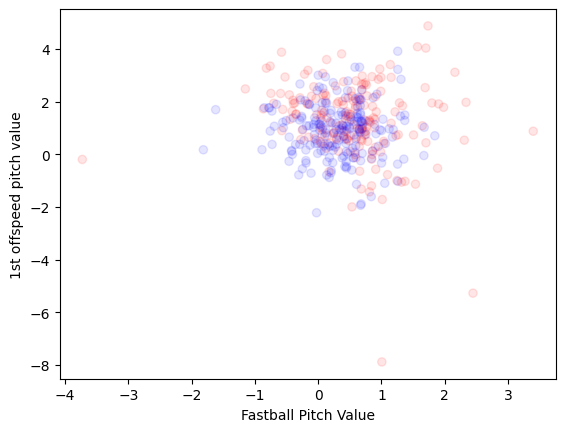

In [ ]:
plt.scatter(fastball_v,offspeed_1st_v,c = colors, alpha = 0.1)
plt.xlabel("Fastball Pitch Value")
plt.ylabel("1st offspeed pitch value")

Text(0, 0.5, '2nd offspeed pitch value')

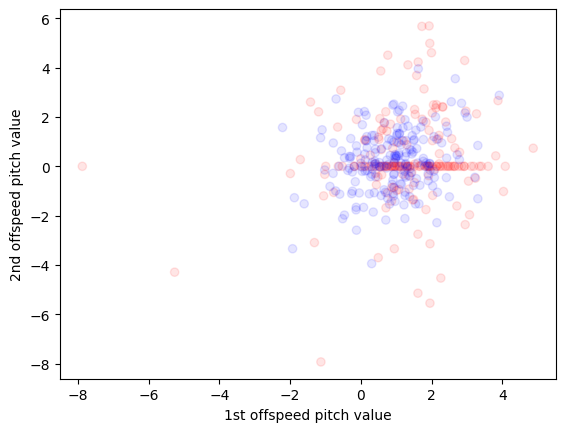

In [ ]:
plt.scatter(offspeed_1st_v,offspeed_2nd_v,c = colors, alpha = 0.1)
plt.xlabel("1st offspeed pitch value")
plt.ylabel("2nd offspeed pitch value")

Text(0, 0.5, '3rd offspeed pitch value')

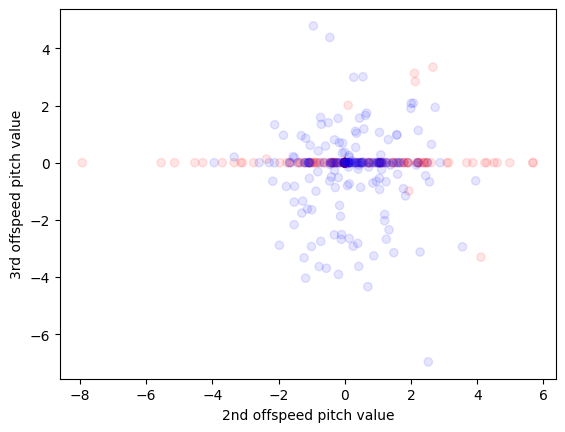

In [ ]:
plt.scatter(offspeed_2nd_v,offspeed_3rd_v,c = colors, alpha = 0.1)
plt.xlabel("2nd offspeed pitch value")
plt.ylabel("3rd offspeed pitch value")

In [ ]:
#After filtering through WPA and WAR
RP_count = 0
RP_1st_count = 0
RP_2nd_count = 0
RP_3rd_count = 0
SP_count = 0
SP_1st_count = 0
SP_2nd_count = 0
SP_3rd_count = 0
for i in range(len(colors)):
  if colors[i] == 'red':
    RP_count += 1
    if offspeed_1st_pct[i] > 0:
      RP_1st_count += 1
    if offspeed_2nd_pct[i] > 0:
      RP_2nd_count += 1
    if offspeed_3rd_pct[i] > 0:
      RP_3rd_count += 1
  else:
    SP_count += 1
    if offspeed_1st_pct[i] > 0:
      SP_1st_count += 1
    if offspeed_2nd_pct[i] > 0:
      SP_2nd_count += 1
    if offspeed_3rd_pct[i] > 0:
      SP_3rd_count += 1
print("Ratio of SPs having 1st offspeed:", SP_1st_count/SP_count)
print("Ratio of SPs having 2nd offspeed:", SP_2nd_count/SP_count)
print("Ratio of SPs having 3rd offspeed:",SP_3rd_count/SP_count)
print("Ratio of RPs having 1st offspeed:", RP_1st_count/RP_count)
print("Ratio of RPs having 2nd offspeed:",RP_2nd_count/RP_count)
print("Ratio of RPs having 3rd offspeed:",RP_3rd_count/RP_count)

Ratio of SPs having 1st offspeed: 1.0
Ratio of SPs having 2nd offspeed: 0.9847715736040609
Ratio of SPs having 3rd offspeed: 0.5685279187817259
Ratio of RPs having 1st offspeed: 1.0
Ratio of RPs having 2nd offspeed: 0.6101694915254238
Ratio of RPs having 3rd offspeed: 0.03954802259887006


In [ ]:
#RPs with good 3rd offspeed
for i in range(len(offspeed_3rd_v)):
  if offspeed_3rd_v[i] > 1 and colors[i] == 'red':
    print(names[i],offspeed_3rd_pct[i])

Ryan Pressly 0.0352
Jimmy Herget 0.0746
Jhoan Duran 0.0323
Hunter Harvey 0.0737
